In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
magnetization = np.loadtxt("magnetization_each_step_1_million_10_lo.txt")

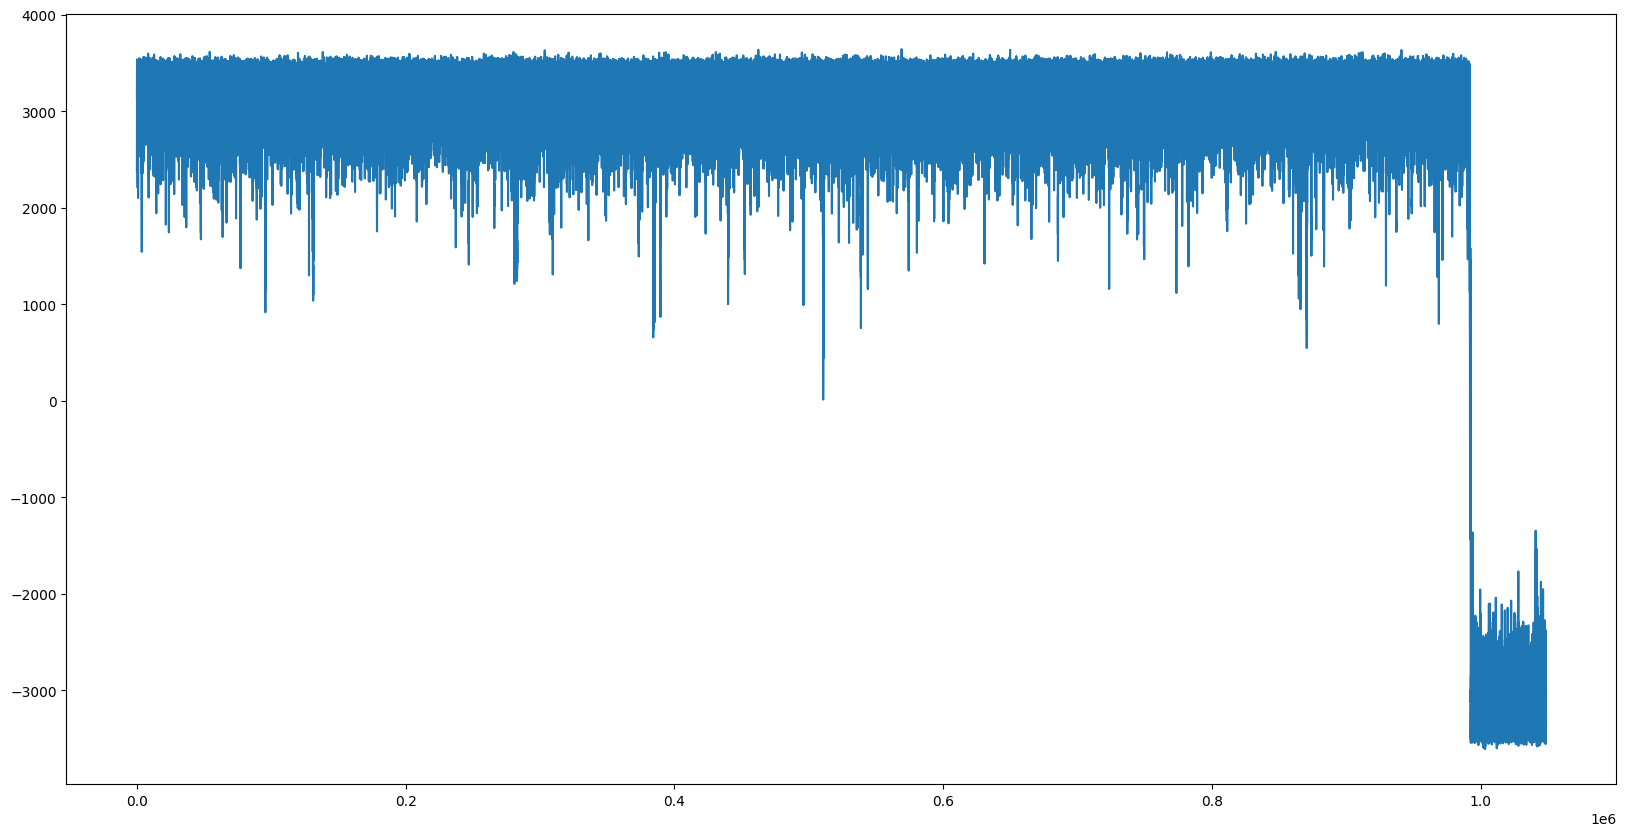

In [4]:
plt.figure(figsize=(20,10))
plt.plot(np.arange(len(magnetization)), magnetization)

In [5]:
nbins = 32

In [6]:
tau_n = []

for i in range(nbins, len(magnetization), nbins):
    
    samples_per_bin = i//nbins
    
    values_to_bin = magnetization[:i]

    var_0 = np.var(values_to_bin)
    mean_0 = np.mean(values_to_bin)

    mean = np.zeros(nbins)
    
    for j in range(nbins):
        mean[j] = np.mean(values_to_bin[j*samples_per_bin:(j+1)*samples_per_bin])

    tau = np.sum((mean - mean_0)**2)/(nbins-1)

    tau_n.append(tau/var_0)

In [5]:
bins = 10

In [6]:
bin_order = {-1: magnetization}

for b in range(bins):
    bin_order[b] = (bin_order[b-1][::2] + bin_order[b-1][1::2])/2

In [7]:
variances = []

for b in range(bins):
    cur_bin = bin_order[b]
    mean_bin = np.mean(cur_bin)
    squared_diff = (cur_bin - mean_bin)**2
    normalized_sum = np.sum(squared_diff)/(len(cur_bin)*(len(cur_bin)-1))
    variances.append(normalized_sum)

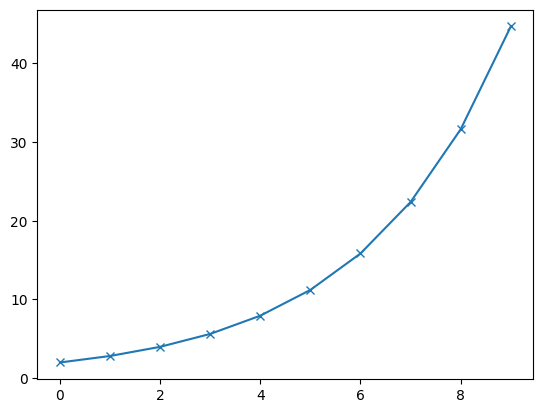

In [8]:
plt.plot(np.arange(len(variances)),np.sqrt(variances),marker = 'x')